Simple Linear Regression

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv('/Users/wech/Library/CloudStorage/OneDrive-UniversidaddelValledeGuatemala/UVG/12VO/Graduación/thesis/datasets/175SR.csv')

In [3]:
df.head()

,Compras,Ventas
0,435.0,398.0
1,803.0,703.0
2,785.0,674.0
3,112.0,102.0
4,530.0,450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Compras  3640 non-null   float64
 1   Ventas   3640 non-null   float64
dtypes: float64(2)
memory usage: 57.0 KB


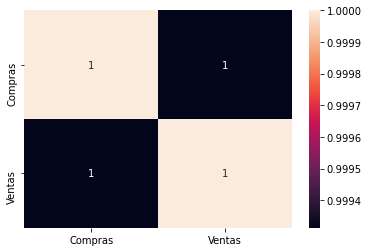

In [5]:
viz = sns.heatmap(df[['Compras','Ventas']].corr(),annot=True)

In [6]:
x = sm.add_constant(df['Compras'])
y = df['Ventas']
print(x.shape)
print(y.shape)
x

(3640, 2)
(3640,)


,const,Compras
0,1.0,435.0
1,1.0,803.0
2,1.0,785.0
3,1.0,112.0
4,1.0,530.0
...,...,...
3635,1.0,2493.0
3636,1.0,1.0
3637,1.0,46.0
3638,1.0,55.0


In [7]:
#Split data Train y Test
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,test_size=0.20,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2912, 2)
(728, 2)
(2912,)
(728,)


In [8]:
compra_venta = sm.OLS(y_train,x_train).fit()

In [10]:
print(compra_venta.params)

const     -1.462021
Compras    0.958147
dtype: float64


In [11]:
compra_venta.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.998     
Dependent Variable: Ventas           AIC:                33485.3762
Date:               2022-09-05 18:51 BIC:                33497.3293
No. Observations:   2912             Log-Likelihood:     -16741.   
Df Model:           1                F-statistic:        1.934e+06 
Df Residuals:       2910             Prob (F-statistic): 0.00      
R-squared:          0.998            Scale:              5770.6    
---------------------------------------------------------------------
            Coef.    Std.Err.       t       P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const      -1.4620     1.4224     -1.0278   0.3041   -4.2510   1.3270
Compras     0.9581     0.0007   1390.7217   0.0000    0.9568   0.9595
-------------------------------------------------------------------
Omnibus:            3705.924     Durbin-Watson:        2.008       
Prob(Omnibus):      0.000        Jarque-Bera (JB):     12351331.045
Skew:               -5.774       Prob(JB):             0.000       
Kurtosis:           321.847      Condition No.:        2086        
===================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [12]:
y_pred_test = compra_venta.predict(x_test)
y_pred_train = compra_venta.predict(x_train)

In [16]:
np.abs(r2_score(y_train,y_pred_train))

0.9984976898450656

In [19]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

75.93852496652276

Text(0, 0.5, 'Predicted')

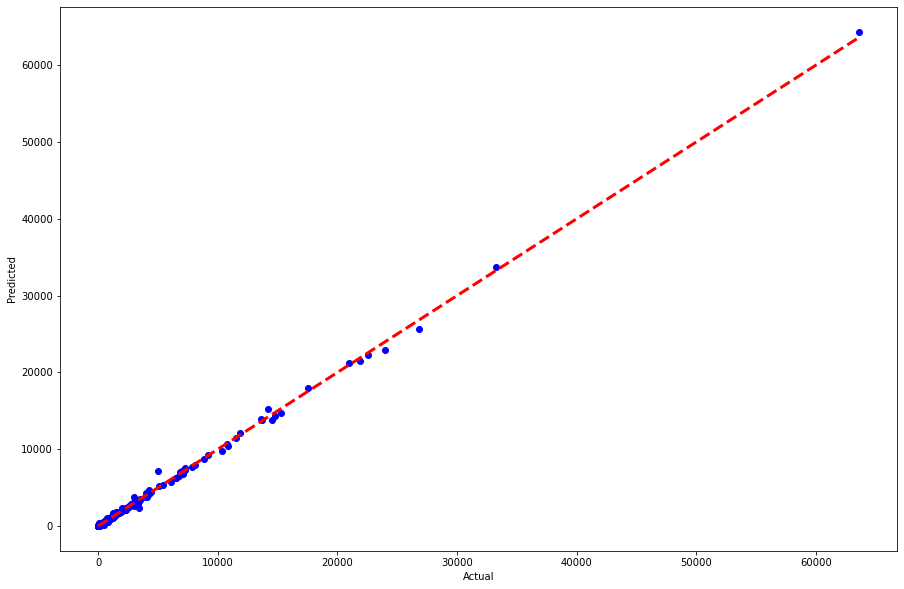

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_pred_train,c='blue')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='red',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [36]:
pred_y_df = pd.DataFrame({'Actual Value':y_train, 'Predicted Value':y_pred_train, 'Difference': y_train-y_pred_train})
pred_y_df[0:25]

,Actual Value,Predicted Value,Difference
1283,9.0,11.952038,-2.952038
3004,70.0,60.817540,9.182460
562,3471.0,3440.202310,30.797690
1273,14.0,40.696451,-26.696451
2956,24.0,22.491656,1.508344
299,6809.0,7076.370498,-267.370498
2409,18.0,14.826480,3.173520
1122,62.0,63.691981,-1.691981
2994,10.0,17.700921,-7.700921
606,253.0,205.497750,47.502250
